In [1]:
using CSV, DataFrames

┌ Info: Recompiling stale cache file /Users/adrian/.julia/compiled/v1.0/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1187


In [3]:
df = CSV.read("data/une_rt_m_1.tsv", header = true, delim = '\t')

,"GEO,S_ADJ,AGE,UNIT,SEX\TIME",2005M01,2005M02,2005M03,2005M04,2005M05,2005M06,2005M07,2005M08,2005M09,2005M10,2005M11,2005M12,2006M01,2006M02,2006M03,2006M04,2006M05,2006M06,2006M07,2006M08,2006M09,2006M10,2006M11,2006M12,2007M01,2007M02,2007M03,2007M04,2007M05,2007M06,2007M07,2007M08,2007M09,2007M10,2007M11,2007M12,2008M01,2008M02,2008M03,2008M04,2008M05,2008M06,2008M07,2008M08,2008M09,2008M10,2008M11,2008M12,2009M01,2009M02,2009M03,2009M04,2009M05,2009M06,2009M07,2009M08,2009M09,2009M10,2009M11,2009M12,2010M01,2010M02,2010M03,2010M04,2010M05,2010M06,2010M07,2010M08,2010M09,2010M10,2010M11,2010M12,2011M01,2011M02,2011M03,2011M04,2011M05,2011M06,2011M07,2011M08,2011M09,2011M10,2011M11,2011M12,2012M01,2012M02,2012M03,2012M04,2012M05,2012M06,2012M07,2012M08,2012M09,2012M10,2012M11,2012M12,2013M01,2013M02,2013M03,2013M04,2013M05,2013M06,2013M07,2013M08,2013M09,2013M10,2013M11,2013M12,2014M01,2014M02,2014M03,2014M04,2014M05,2014M06,2014M07,2014M08,2014M09,2014M10,2014M11,2014M12,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,2015M10,2015M11,2015M12,2016M01,2016M02,2016M03,2016M04,2016M05,2016M06,2016M07,2016M08,2016M09,2016M10,2016M11,2016M12,2017M01,2017M02,2017M03,2017M04,2017M05,2017M06,2017M07,2017M08,2017M09,2017M10,2017M11,2017M12
,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰,String⍰
1,"European Union (current composition),Unadjusted data (i.e. neither seasonally adjusted nor calendar adjusted data),Total,Thousand persons,Total",21 974,22 303,22 085,21 036,20 849,20 549,19 873,20 210,20 554,20 919,20 599,20 470,21 140,20 980,20 578,19 687,19 047,18 859,18 517,18 649,18 708,18 706,18 727,18 316,18 552,18 559,17 842,17 051,16 758,16 420,16 497,16 475,16 470,16 406,16 449,16 510,16 989,16 904,16 597,16 392,16 051,16 430,16 142,16 284,16 499,16 985,17 582,18 328,19 940,21 067,21 327,21 243,20 940,20 972,21 131,21 305,21 796,22 089,22 308,22 479,23 920,24 383,23 912,23 410,22 880,22 336,22 209,22 036,22 475,22 946,22 829,22 840,23 614,23 644,23 407,22 626,22 464,22 282,22 365,22 590,22 990,23 524,24 098,24 196,25 278,25 596,25 565,25 028,24 946,24 669,24 696,24 652,25 144,25 799,26 176,25 979,27 577,27 790,27 292,26 755,26 292,25 805,25 501,25 459,25 813,25 918,26 144,25 629,26 785,26 804,26 226,25 242,24 692,23 898,23 668,23 648,24 058,24 410,24 755,23 792,24 626,24 798,24 365,23 566,22 989,22 652,21 902,21 594,21 962,22 226,22 201,21 941,22 430,22 560,22 097,21 345,20 957,20 611,20 215,20 082,20 257,20 343,20 477,19 893,20 512,20 443,19 929,19 203,18 713,18 155,18 172,18 155,18 121,18 199,18 027,17 705


In [5]:
values = convert(Array, df[1, 2:end])

1×156 Array{Union{Missing, String},2}:
 "21 974"  "22 303"  "22 085"  "21 036"  …  "18 199"  "18 027"  "17 705"

In [7]:
values = map(x -> parse(Int, replace(x, " "=>"")), values)[:]

156-element Array{Int64,1}:
 21974
 22303
 22085
 21036
 20849
 20549
 19873
 20210
 20554
 20919
 20599
 20470
 21140
     ⋮
 20512
 20443
 19929
 19203
 18713
 18155
 18172
 18155
 18121
 18199
 18027
 17705

In [8]:
dates = names(df)[2:end]

156-element Array{Symbol,1}:
 Symbol("2005M01")
 Symbol("2005M02")
 Symbol("2005M03")
 Symbol("2005M04")
 Symbol("2005M05")
 Symbol("2005M06")
 Symbol("2005M07")
 Symbol("2005M08")
 Symbol("2005M09")
 Symbol("2005M10")
 Symbol("2005M11")
 Symbol("2005M12")
 Symbol("2006M01")
 ⋮                
 Symbol("2017M01")
 Symbol("2017M02")
 Symbol("2017M03")
 Symbol("2017M04")
 Symbol("2017M05")
 Symbol("2017M06")
 Symbol("2017M07")
 Symbol("2017M08")
 Symbol("2017M09")
 Symbol("2017M10")
 Symbol("2017M11")
 Symbol("2017M12")

In [10]:
dates = map(x -> replace(string(x), "M"=>"-"), dates)

156-element Array{String,1}:
 "2005-01"
 "2005-02"
 "2005-03"
 "2005-04"
 "2005-05"
 "2005-06"
 "2005-07"
 "2005-08"
 "2005-09"
 "2005-10"
 "2005-11"
 "2005-12"
 "2006-01"
 ⋮        
 "2017-01"
 "2017-02"
 "2017-03"
 "2017-04"
 "2017-05"
 "2017-06"
 "2017-07"
 "2017-08"
 "2017-09"
 "2017-10"
 "2017-11"
 "2017-12"

In [12]:
using Dates
dateformat = DateFormat("y-m")

dateformat"y-m"

In [13]:
dates = map(x -> Date(x, dateformat), dates)

156-element Array{Date,1}:
 2005-01-01
 2005-02-01
 2005-03-01
 2005-04-01
 2005-05-01
 2005-06-01
 2005-07-01
 2005-08-01
 2005-09-01
 2005-10-01
 2005-11-01
 2005-12-01
 2006-01-01
 ⋮         
 2017-01-01
 2017-02-01
 2017-03-01
 2017-04-01
 2017-05-01
 2017-06-01
 2017-07-01
 2017-08-01
 2017-09-01
 2017-10-01
 2017-11-01
 2017-12-01

In [14]:
df2 = DataFrame(Dates = dates, Values = values)

,Dates,Values
,Date,Int64
1,2005-01-01,21974
2,2005-02-01,22303
3,2005-03-01,22085
4,2005-04-01,21036
5,2005-05-01,20849
6,2005-06-01,20549
7,2005-07-01,19873
8,2005-08-01,20210
9,2005-09-01,20554


In [15]:
CSV.write("UE-unemployment.tsv", df2)

"UE-unemployment.tsv"

In [17]:
using TimeSeries
unemployment_data = readtimearray("UE-unemployment.tsv")

156×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-01-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ 2005-09-01 │ 20554.0 │
│ 2005-10-01 │ 20919.0 │
│ 2005-11-01 │ 20599.0 │
│ 2005-12-01 │ 20470.0 │
   ⋮
│ 2017-02-01 │ 20443.0 │
│ 2017-03-01 │ 19929.0 │
│ 2017-04-01 │ 19203.0 │
│ 2017-05-01 │ 18713.0 │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │

In [18]:
TimeSeries.head(unemployment_data, 10)

10×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-01-01 to 2005-10-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ 2005-09-01 │ 20554.0 │
│ 2005-10-01 │ 20919.0 │

In [23]:
using Pkg
pkg"add PyCall LaTeXStrings"

 Resolving package versions...
  Updating `~/.julia/environments/v1.0/Project.toml`
  [b964fa9f] + LaTeXStrings v1.0.3
  Updating `~/.julia/environments/v1.0/Manifest.toml`
 [no changes]


In [24]:
using Plots
pyplot()

Plots.PyPlotBackend()

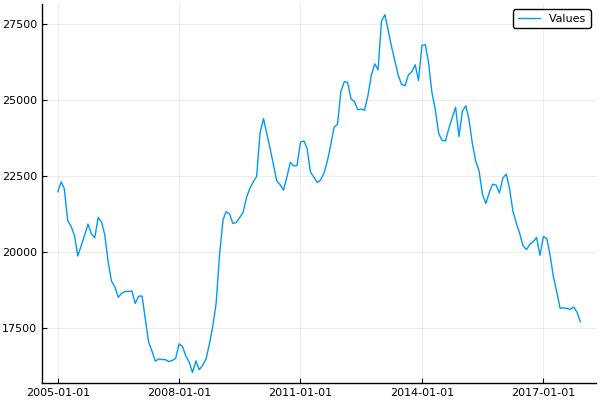

In [25]:
plot(unemployment_data)

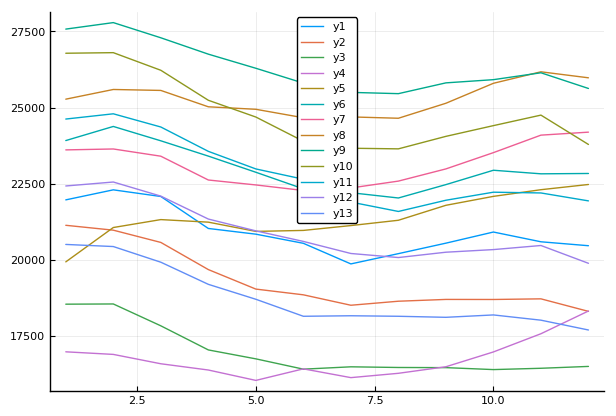

In [37]:
plot()
for y in 2005:2017
	TimeSeries.values(when(unemployment_data, year, y))[:] |> plot!
    gui()
end

In [39]:
using Statistics
moving_avg = moving(mean, unemployment_data, 12)

145×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-12-01 to 2017-12-01
│            │ Values     │
├────────────┼────────────┤
│ 2005-12-01 │ 20951.75   │
│ 2006-01-01 │ 20882.25   │
│ 2006-02-01 │ 20772.0    │
│ 2006-03-01 │ 20646.4167 │
│ 2006-04-01 │ 20534.0    │
│ 2006-05-01 │ 20383.8333 │
│ 2006-06-01 │ 20243.0    │
│ 2006-07-01 │ 20130.0    │
│ 2006-08-01 │ 19999.9167 │
│ 2006-09-01 │ 19846.0833 │
│ 2006-10-01 │ 19661.6667 │
│ 2006-11-01 │ 19505.6667 │
   ⋮
│ 2017-02-01 │ 20602.6667 │
│ 2017-03-01 │ 20422.0    │
│ 2017-04-01 │ 20243.5    │
│ 2017-05-01 │ 20056.5    │
│ 2017-06-01 │ 19851.8333 │
│ 2017-07-01 │ 19681.5833 │
│ 2017-08-01 │ 19521.0    │
│ 2017-09-01 │ 19343.0    │
│ 2017-10-01 │ 19164.3333 │
│ 2017-11-01 │ 18960.1667 │
│ 2017-12-01 │ 18777.8333 │

In [40]:
moving(mean, unemployment_data, 12, padding = true)

156×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-01-01 to 2017-12-01
│            │ Values     │
├────────────┼────────────┤
│ 2005-01-01 │ NaN        │
│ 2005-02-01 │ NaN        │
│ 2005-03-01 │ NaN        │
│ 2005-04-01 │ NaN        │
│ 2005-05-01 │ NaN        │
│ 2005-06-01 │ NaN        │
│ 2005-07-01 │ NaN        │
│ 2005-08-01 │ NaN        │
│ 2005-09-01 │ NaN        │
│ 2005-10-01 │ NaN        │
│ 2005-11-01 │ NaN        │
│ 2005-12-01 │ 20951.75   │
   ⋮
│ 2017-02-01 │ 20602.6667 │
│ 2017-03-01 │ 20422.0    │
│ 2017-04-01 │ 20243.5    │
│ 2017-05-01 │ 20056.5    │
│ 2017-06-01 │ 19851.8333 │
│ 2017-07-01 │ 19681.5833 │
│ 2017-08-01 │ 19521.0    │
│ 2017-09-01 │ 19343.0    │
│ 2017-10-01 │ 19164.3333 │
│ 2017-11-01 │ 18960.1667 │
│ 2017-12-01 │ 18777.8333 │

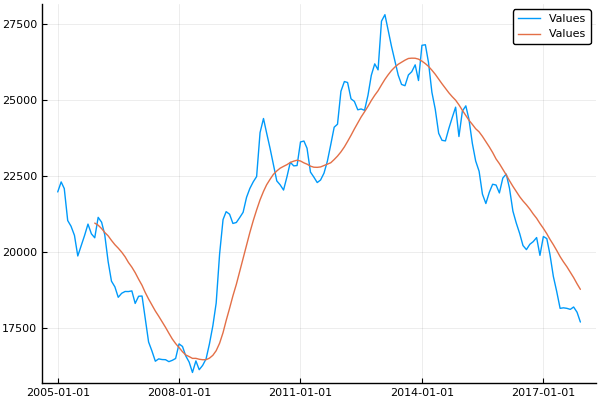

In [41]:
plot(unemployment_data)
plot!(moving_avg)

In [42]:
sn = unemployment_data ./ moving_avg

145×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-12-01 to 2017-12-01
│            │ Values_Values │
├────────────┼───────────────┤
│ 2005-12-01 │ 0.977         │
│ 2006-01-01 │ 1.0123        │
│ 2006-02-01 │ 1.01          │
│ 2006-03-01 │ 0.9967        │
│ 2006-04-01 │ 0.9588        │
│ 2006-05-01 │ 0.9344        │
│ 2006-06-01 │ 0.9316        │
│ 2006-07-01 │ 0.9199        │
│ 2006-08-01 │ 0.9325        │
│ 2006-09-01 │ 0.9427        │
│ 2006-10-01 │ 0.9514        │
│ 2006-11-01 │ 0.9601        │
   ⋮
│ 2017-02-01 │ 0.9923        │
│ 2017-03-01 │ 0.9759        │
│ 2017-04-01 │ 0.9486        │
│ 2017-05-01 │ 0.933         │
│ 2017-06-01 │ 0.9145        │
│ 2017-07-01 │ 0.9233        │
│ 2017-08-01 │ 0.93          │
│ 2017-09-01 │ 0.9368        │
│ 2017-10-01 │ 0.9496        │
│ 2017-11-01 │ 0.9508        │
│ 2017-12-01 │ 0.9429        │

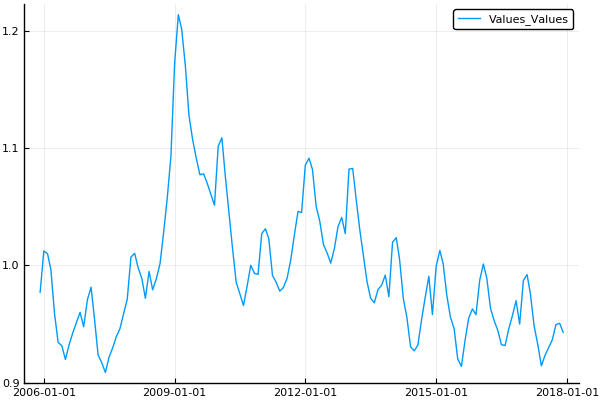

In [43]:
plot(sn)

In [44]:
month_avg = Float64[]

0-element Array{Float64,1}

In [47]:
for m in 1:12
	md = when(sn, month, m)
	push!(month_avg, mean(TimeSeries.values(md)[:]))
end

In [48]:
month_avg

12-element Array{Float64,1}:
 1.0376512639850295
 1.0466377033754193
 1.0301198608484736
 1.0014842494206564
 0.9830320492870818
 0.9705256323692862
 0.9630153389575429
 0.9634443756458616
 0.9763782494700372
 0.9893785521401298
 0.9987100016253194
 0.9913489915307253

In [52]:
s = sum(month_avg)

11.951726268655563

In [53]:
norm_month_avg = map(m -> 12m/s, month_avg)

12-element Array{Float64,1}:
 1.0418423989910408
 1.0508651351431808
 1.0342805760704734
 1.0055293037095092
 0.9870025740450584
 0.9744456429674838
 0.9669050150351592
 0.9673357846281114
 0.9803218991358666
 0.993374710799588 
 1.0027438505627655
 0.9953531089117633

In [54]:
sum(norm_month_avg)

12.0

In [55]:
adj_unemployment_data = deepcopy(unemployment_data)

156×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-01-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ 2005-09-01 │ 20554.0 │
│ 2005-10-01 │ 20919.0 │
│ 2005-11-01 │ 20599.0 │
│ 2005-12-01 │ 20470.0 │
   ⋮
│ 2017-02-01 │ 20443.0 │
│ 2017-03-01 │ 19929.0 │
│ 2017-04-01 │ 19203.0 │
│ 2017-05-01 │ 18713.0 │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │

In [56]:
map(adj_unemployment_data) do d,v
	v[1] /= norm_month_avg[month(d)]
	d,v
end

156×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-01-01 to 2017-12-01
│            │ Values     │
├────────────┼────────────┤
│ 2005-01-01 │ 21091.4818 │
│ 2005-02-01 │ 21223.4656 │
│ 2005-03-01 │ 21353.0066 │
│ 2005-04-01 │ 20920.3252 │
│ 2005-05-01 │ 21123.5518 │
│ 2005-06-01 │ 21087.8874 │
│ 2005-07-01 │ 20553.2081 │
│ 2005-08-01 │ 20892.435  │
│ 2005-09-01 │ 20966.5825 │
│ 2005-10-01 │ 21058.5188 │
│ 2005-11-01 │ 20542.6341 │
│ 2005-12-01 │ 20565.5659 │
   ⋮
│ 2017-02-01 │ 19453.4953 │
│ 2017-03-01 │ 19268.4659 │
│ 2017-04-01 │ 19097.4046 │
│ 2017-05-01 │ 18959.4237 │
│ 2017-06-01 │ 18631.1059 │
│ 2017-07-01 │ 18793.9867 │
│ 2017-08-01 │ 18768.0434 │
│ 2017-09-01 │ 18484.7447 │
│ 2017-10-01 │ 18320.3778 │
│ 2017-11-01 │ 17977.672  │
│ 2017-12-01 │ 17787.6573 │

In [59]:
using Dates
ts1 = TimeArray(Date(today()) - Week(1):Day(1):Date(today()) |> collect, rand(8))

8×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2018-11-06 to 2018-11-13
│            │ A      │
├────────────┼────────┤
│ 2018-11-06 │ 0.3999 │
│ 2018-11-07 │ 0.5622 │
│ 2018-11-08 │ 0.8924 │
│ 2018-11-09 │ 0.9108 │
│ 2018-11-10 │ 0.6939 │
│ 2018-11-11 │ 0.4074 │
│ 2018-11-12 │ 0.8499 │
│ 2018-11-13 │ 0.7716 │

In [60]:
ts2 = TimeArray(Date(today()) - Week(1):Day(1):Date(today()) |> collect, rand(8))

8×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2018-11-06 to 2018-11-13
│            │ A      │
├────────────┼────────┤
│ 2018-11-06 │ 0.4007 │
│ 2018-11-07 │ 0.6575 │
│ 2018-11-08 │ 0.8069 │
│ 2018-11-09 │ 0.855  │
│ 2018-11-10 │ 0.7133 │
│ 2018-11-11 │ 0.0833 │
│ 2018-11-12 │ 0.0175 │
│ 2018-11-13 │ 0.4259 │

In [61]:
tsc = ts1 .> ts2

8×1 TimeArray{Bool,1,Date,BitArray{1}} 2018-11-06 to 2018-11-13
│            │ A_A   │
├────────────┼───────┤
│ 2018-11-06 │ false │
│ 2018-11-07 │ false │
│ 2018-11-08 │ true  │
│ 2018-11-09 │ true  │
│ 2018-11-10 │ false │
│ 2018-11-11 │ true  │
│ 2018-11-12 │ true  │
│ 2018-11-13 │ true  │

In [62]:
tsc .== false

8×1 TimeArray{Bool,1,Date,BitArray{1}} 2018-11-06 to 2018-11-13
│            │ A_A   │
├────────────┼───────┤
│ 2018-11-06 │ true  │
│ 2018-11-07 │ true  │
│ 2018-11-08 │ false │
│ 2018-11-09 │ false │
│ 2018-11-10 │ true  │
│ 2018-11-11 │ false │
│ 2018-11-12 │ false │
│ 2018-11-13 │ false │

In [64]:
diffts = diff(unemployment_data)

155×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-02-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-02-01 │ 329.0   │
│ 2005-03-01 │ -218.0  │
│ 2005-04-01 │ -1049.0 │
│ 2005-05-01 │ -187.0  │
│ 2005-06-01 │ -300.0  │
│ 2005-07-01 │ -676.0  │
│ 2005-08-01 │ 337.0   │
│ 2005-09-01 │ 344.0   │
│ 2005-10-01 │ 365.0   │
│ 2005-11-01 │ -320.0  │
│ 2005-12-01 │ -129.0  │
│ 2006-01-01 │ 670.0   │
   ⋮
│ 2017-02-01 │ -69.0   │
│ 2017-03-01 │ -514.0  │
│ 2017-04-01 │ -726.0  │
│ 2017-05-01 │ -490.0  │
│ 2017-06-01 │ -558.0  │
│ 2017-07-01 │ 17.0    │
│ 2017-08-01 │ -17.0   │
│ 2017-09-01 │ -34.0   │
│ 2017-10-01 │ 78.0    │
│ 2017-11-01 │ -172.0  │
│ 2017-12-01 │ -322.0  │

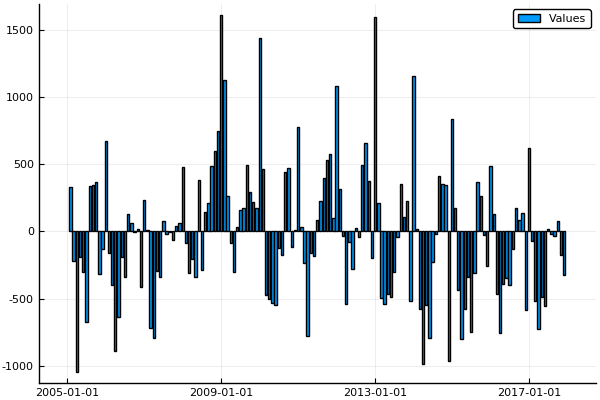

In [65]:
bar(diffts)

In [67]:
ts1

8×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2018-11-06 to 2018-11-13
│            │ A      │
├────────────┼────────┤
│ 2018-11-06 │ 0.3999 │
│ 2018-11-07 │ 0.5622 │
│ 2018-11-08 │ 0.8924 │
│ 2018-11-09 │ 0.9108 │
│ 2018-11-10 │ 0.6939 │
│ 2018-11-11 │ 0.4074 │
│ 2018-11-12 │ 0.8499 │
│ 2018-11-13 │ 0.7716 │

In [66]:
lag(ts1)

7×1 TimeArray{Float64,1,Date,Array{Float64,1}} 2018-11-07 to 2018-11-13
│            │ A      │
├────────────┼────────┤
│ 2018-11-07 │ 0.3999 │
│ 2018-11-08 │ 0.5622 │
│ 2018-11-09 │ 0.8924 │
│ 2018-11-10 │ 0.9108 │
│ 2018-11-11 │ 0.6939 │
│ 2018-11-12 │ 0.4074 │
│ 2018-11-13 │ 0.8499 │

In [68]:
lagged = lag(unemployment_data, 12)

144×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2006-01-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2006-01-01 │ 21974.0 │
│ 2006-02-01 │ 22303.0 │
│ 2006-03-01 │ 22085.0 │
│ 2006-04-01 │ 21036.0 │
│ 2006-05-01 │ 20849.0 │
│ 2006-06-01 │ 20549.0 │
│ 2006-07-01 │ 19873.0 │
│ 2006-08-01 │ 20210.0 │
│ 2006-09-01 │ 20554.0 │
│ 2006-10-01 │ 20919.0 │
│ 2006-11-01 │ 20599.0 │
│ 2006-12-01 │ 20470.0 │
   ⋮
│ 2017-02-01 │ 22560.0 │
│ 2017-03-01 │ 22097.0 │
│ 2017-04-01 │ 21345.0 │
│ 2017-05-01 │ 20957.0 │
│ 2017-06-01 │ 20611.0 │
│ 2017-07-01 │ 20215.0 │
│ 2017-08-01 │ 20082.0 │
│ 2017-09-01 │ 20257.0 │
│ 2017-10-01 │ 20343.0 │
│ 2017-11-01 │ 20477.0 │
│ 2017-12-01 │ 19893.0 │

In [69]:
common = merge(unemployment_data, lagged)

144×2 TimeArray{Float64,2,Date,Array{Float64,2}} 2006-01-01 to 2017-12-01
│            │ Values  │ Values_1 │
├────────────┼─────────┼──────────┤
│ 2006-01-01 │ 21140.0 │ 21974.0  │
│ 2006-02-01 │ 20980.0 │ 22303.0  │
│ 2006-03-01 │ 20578.0 │ 22085.0  │
│ 2006-04-01 │ 19687.0 │ 21036.0  │
│ 2006-05-01 │ 19047.0 │ 20849.0  │
│ 2006-06-01 │ 18859.0 │ 20549.0  │
│ 2006-07-01 │ 18517.0 │ 19873.0  │
│ 2006-08-01 │ 18649.0 │ 20210.0  │
│ 2006-09-01 │ 18708.0 │ 20554.0  │
│ 2006-10-01 │ 18706.0 │ 20919.0  │
│ 2006-11-01 │ 18727.0 │ 20599.0  │
│ 2006-12-01 │ 18316.0 │ 20470.0  │
   ⋮
│ 2017-02-01 │ 20443.0 │ 22560.0  │
│ 2017-03-01 │ 19929.0 │ 22097.0  │
│ 2017-04-01 │ 19203.0 │ 21345.0  │
│ 2017-05-01 │ 18713.0 │ 20957.0  │
│ 2017-06-01 │ 18155.0 │ 20611.0  │
│ 2017-07-01 │ 18172.0 │ 20215.0  │
│ 2017-08-01 │ 18155.0 │ 20082.0  │
│ 2017-09-01 │ 18121.0 │ 20257.0  │
│ 2017-10-01 │ 18199.0 │ 20343.0  │
│ 2017-11-01 │ 18027.0 │ 20477.0  │
│ 2017-12-01 │ 17705.0 │ 19893.0  │

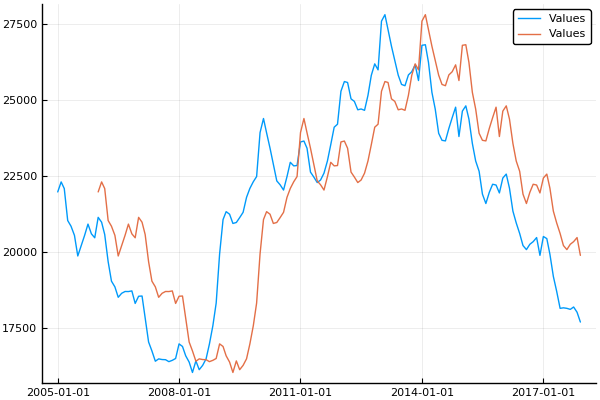

In [70]:
plot(unemployment_data)
plot!(lagged)

In [72]:
update(unemployment_data, Date(2018, 1, 1), TimeSeries.values(adj_unemployment_data[end])[:][end] * norm_month_avg[1] |> round)

157×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2005-01-01 to 2018-01-01
│            │ Values  │
├────────────┼─────────┤
│ 2005-01-01 │ 21974.0 │
│ 2005-02-01 │ 22303.0 │
│ 2005-03-01 │ 22085.0 │
│ 2005-04-01 │ 21036.0 │
│ 2005-05-01 │ 20849.0 │
│ 2005-06-01 │ 20549.0 │
│ 2005-07-01 │ 19873.0 │
│ 2005-08-01 │ 20210.0 │
│ 2005-09-01 │ 20554.0 │
│ 2005-10-01 │ 20919.0 │
│ 2005-11-01 │ 20599.0 │
│ 2005-12-01 │ 20470.0 │
   ⋮
│ 2017-03-01 │ 19929.0 │
│ 2017-04-01 │ 19203.0 │
│ 2017-05-01 │ 18713.0 │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │
│ 2018-01-01 │ 18446.0 │

In [74]:
mean(TimeSeries.values(adj_unemployment_data)[:])

21589.641025641027

In [82]:
findall(adj_unemployment_data[:Values] .== maximum(TimeSeries.values(adj_unemployment_data)[:]))

1-element Array{Int64,1}:
 98

In [83]:
adj_unemployment_data[98]

1×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2013-02-01 to 2013-02-01
│            │ Values  │
├────────────┼─────────┤
│ 2013-02-01 │ 27790.0 │

In [84]:
last_trend = from(adj_unemployment_data, Date(2013, 2, 1))

59×1 TimeArray{Float64,2,Date,Array{Float64,2}} 2013-02-01 to 2017-12-01
│            │ Values  │
├────────────┼─────────┤
│ 2013-02-01 │ 27790.0 │
│ 2013-03-01 │ 27292.0 │
│ 2013-04-01 │ 26755.0 │
│ 2013-05-01 │ 26292.0 │
│ 2013-06-01 │ 25805.0 │
│ 2013-07-01 │ 25501.0 │
│ 2013-08-01 │ 25459.0 │
│ 2013-09-01 │ 25813.0 │
│ 2013-10-01 │ 25918.0 │
│ 2013-11-01 │ 26144.0 │
│ 2013-12-01 │ 25629.0 │
│ 2014-01-01 │ 26785.0 │
   ⋮
│ 2017-02-01 │ 20443.0 │
│ 2017-03-01 │ 19929.0 │
│ 2017-04-01 │ 19203.0 │
│ 2017-05-01 │ 18713.0 │
│ 2017-06-01 │ 18155.0 │
│ 2017-07-01 │ 18172.0 │
│ 2017-08-01 │ 18155.0 │
│ 2017-09-01 │ 18121.0 │
│ 2017-10-01 │ 18199.0 │
│ 2017-11-01 │ 18027.0 │
│ 2017-12-01 │ 17705.0 │

In [85]:
x = 1:length(last_trend)

1:59

In [87]:
y = TimeSeries.values(last_trend)[:]

59-element Array{Float64,1}:
 27790.0
 27292.0
 26755.0
 26292.0
 25805.0
 25501.0
 25459.0
 25813.0
 25918.0
 26144.0
 25629.0
 26785.0
 26804.0
     ⋮  
 20512.0
 20443.0
 19929.0
 19203.0
 18713.0
 18155.0
 18172.0
 18155.0
 18121.0
 18199.0
 18027.0
 17705.0

In [90]:
linreg(x, y) = reverse([x ones(length(x))]\y)
a, b = linreg(x, y)

2-element Array{Float64,1}:
 27522.02805376972   
  -161.58229105786072

In [91]:
y = a+b*60

17827.09059029808

In [92]:
y = y * norm_month_avg[1] |> round

18573.0

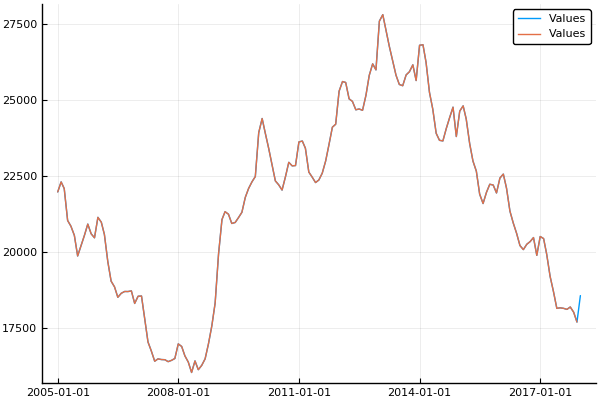

In [94]:
update(unemployment_data, Date(2018, 1, 1), y) |> plot
plot!(unemployment_data)